In [1]:
import numpy as np
import pandas as pd
import os
# import sys

In [3]:
from psychrochart import PsychroChart , load_config
import psychrolib as psylib
psylib.SetUnitSystem(psylib.SI)

from CoolProp.HumidAirProp import HAPropsSI

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [40]:
psylib.GetRelHumFromHumRatio(TDryBulb=298.75-273.15, HumRatio=0.0162, Pressure=101325)

0.7831800337162653

In [41]:
HAPropsSI('R','T',298.75,'P',101325,'W',0.0162)

0.7796973122676524

In [5]:
convert_to_hr = lambda T, W: HAPropsSI('R','T',T,'P',101325,'W',W)

# Chart Psychrometrics

### TODO:
- [x] Color RGBa
- [x] 

### pass in inputdata from dataframe    

In [6]:
def plot_psy_from_df(df_data, chart_template = 'ashrae', alpha = 0.6, save_fig_name = False):
    
    # pre-configuration
    # Get a pre-configured style dict
    config_ashrae = load_config(chart_template)

    # customize configuration:
    # config_ashrae['figure']['x_label'] = None
    # config_ashrae['figure']['y_label'] = None
    config_ashrae['saturation']['linewidth'] = 5
    config_ashrae['chart_params']['with_constant_dry_temp'] = True
    config_ashrae['chart_params']['with_constant_humidity'] = True
    config_ashrae['chart_params']['with_constant_wet_temp'] = False
    config_ashrae['chart_params']['with_constant_h'] = False

    chart_customized_ashrae = PsychroChart(config_ashrae)
    # Plot the chart
    ax = chart_customized_ashrae.plot()
    
    points = {}
    connectors = []
    for i in df_data.index:
        
        # inlet
        air_in = 'air_in_{}'.format(i)
        T_air_in = df_data.loc[i, "T_a_in"]
        rh_air_in = df_data.loc[i, "hr_air_in"]        
        
        # outlet
        air_out = 'air_out_{}'.format(i)
        T_air_out = df_data.loc[i, "T_a_o_exp"]
        rh_air_out = df_data.loc[i, "hr_air_out"]
        
        # color
        color = np.append(np.random.rand(3), alpha)
        print(color)
        
        # plot points
        point = {air_in: {'label': 'air_in_{}'.format(i),
                           'style': {'color': color,
                                     'marker': 'X', 'markersize': 15},
                           'xy': (T_air_in-273.15, rh_air_in)},
              air_out: {
                  'label': 'air_out_{}'.format(i),
                  'style': {'color': color,
                            'marker': 'o', 'markersize': 10},
                  'xy': (T_air_out-273.15, rh_air_out)}                      
                    }
        
        # plot connectors
        # here the color CANNOT be specified by string e.g. red...
        connector = {'start': air_in,
                       'end': air_out,
                       'style': {'color': color,
                                 "linewidth": 2, "linestyle": "-."}}
        
        # add into dict and list
        points.update(point)
        connectors.append(connector)
        
    # add points and conncection to chart
    chart_customized_ashrae.plot_points_dbt_rh(points, connectors)

    # Add a legend
    chart_customized_ashrae.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
    
    if save_fig_name:
        ax.get_figure().savefig(save_fig_name)
    
    return ax.get_figure()

# update Aug 2020
- draw psychro of dempav

In [17]:
df_exp_dempav = pd.read_excel("../table/dempav_results_Aug_final_2020.xlsx", index_col=0)
df_exp_dempav.head()

T_a_in  hr_air_in    m_a_in  T_d_in   xi_d_in    m_d_in  T_a_o_exp  \
0  298.02      48.26  0.018848  287.44  0.318302  0.102670     290.21   
1  300.51      55.58  0.036283  292.20  0.318186  0.102670     294.81   
2  298.02      46.07  0.032644  284.16  0.318572  0.102670     287.98   
3  301.31      50.70  0.036150  290.94  0.318174  0.102669     293.69   
4  299.87      42.59  0.045742  290.34  0.318171  0.102668     292.89   

   hr_air_out  T_d_o_exp  w_air_in  w_air_out    x_a_in  x_a_o_exp  
0       47.90    286.230  0.009439   0.005762  0.009457   0.005773  
1       54.06    290.092  0.012659   0.008699  0.012683   0.008716  
2       50.83    281.766  0.009005   0.005298  0.009022   0.005308  
3       52.19    288.468  0.012089   0.007829  0.012112   0.007844  
4       52.75    288.366  0.009293   0.007528  0.009311   0.007542

[0.046889   0.15971503 0.67050952 0.8       ]
[0.5785127  0.45726577 0.05887506 0.8       ]
[0.17083151 0.62246307 0.85046103 0.8       ]
[0.499974   0.80325937 0.42567085 0.8       ]
[0.34193124 0.08862573 0.09819297 0.8       ]
[0.37273112 0.98625327 0.33759934 0.8       ]
[0.82513927 0.45366734 0.24358454 0.8       ]
[0.1116778  0.39305162 0.15446199 0.8       ]


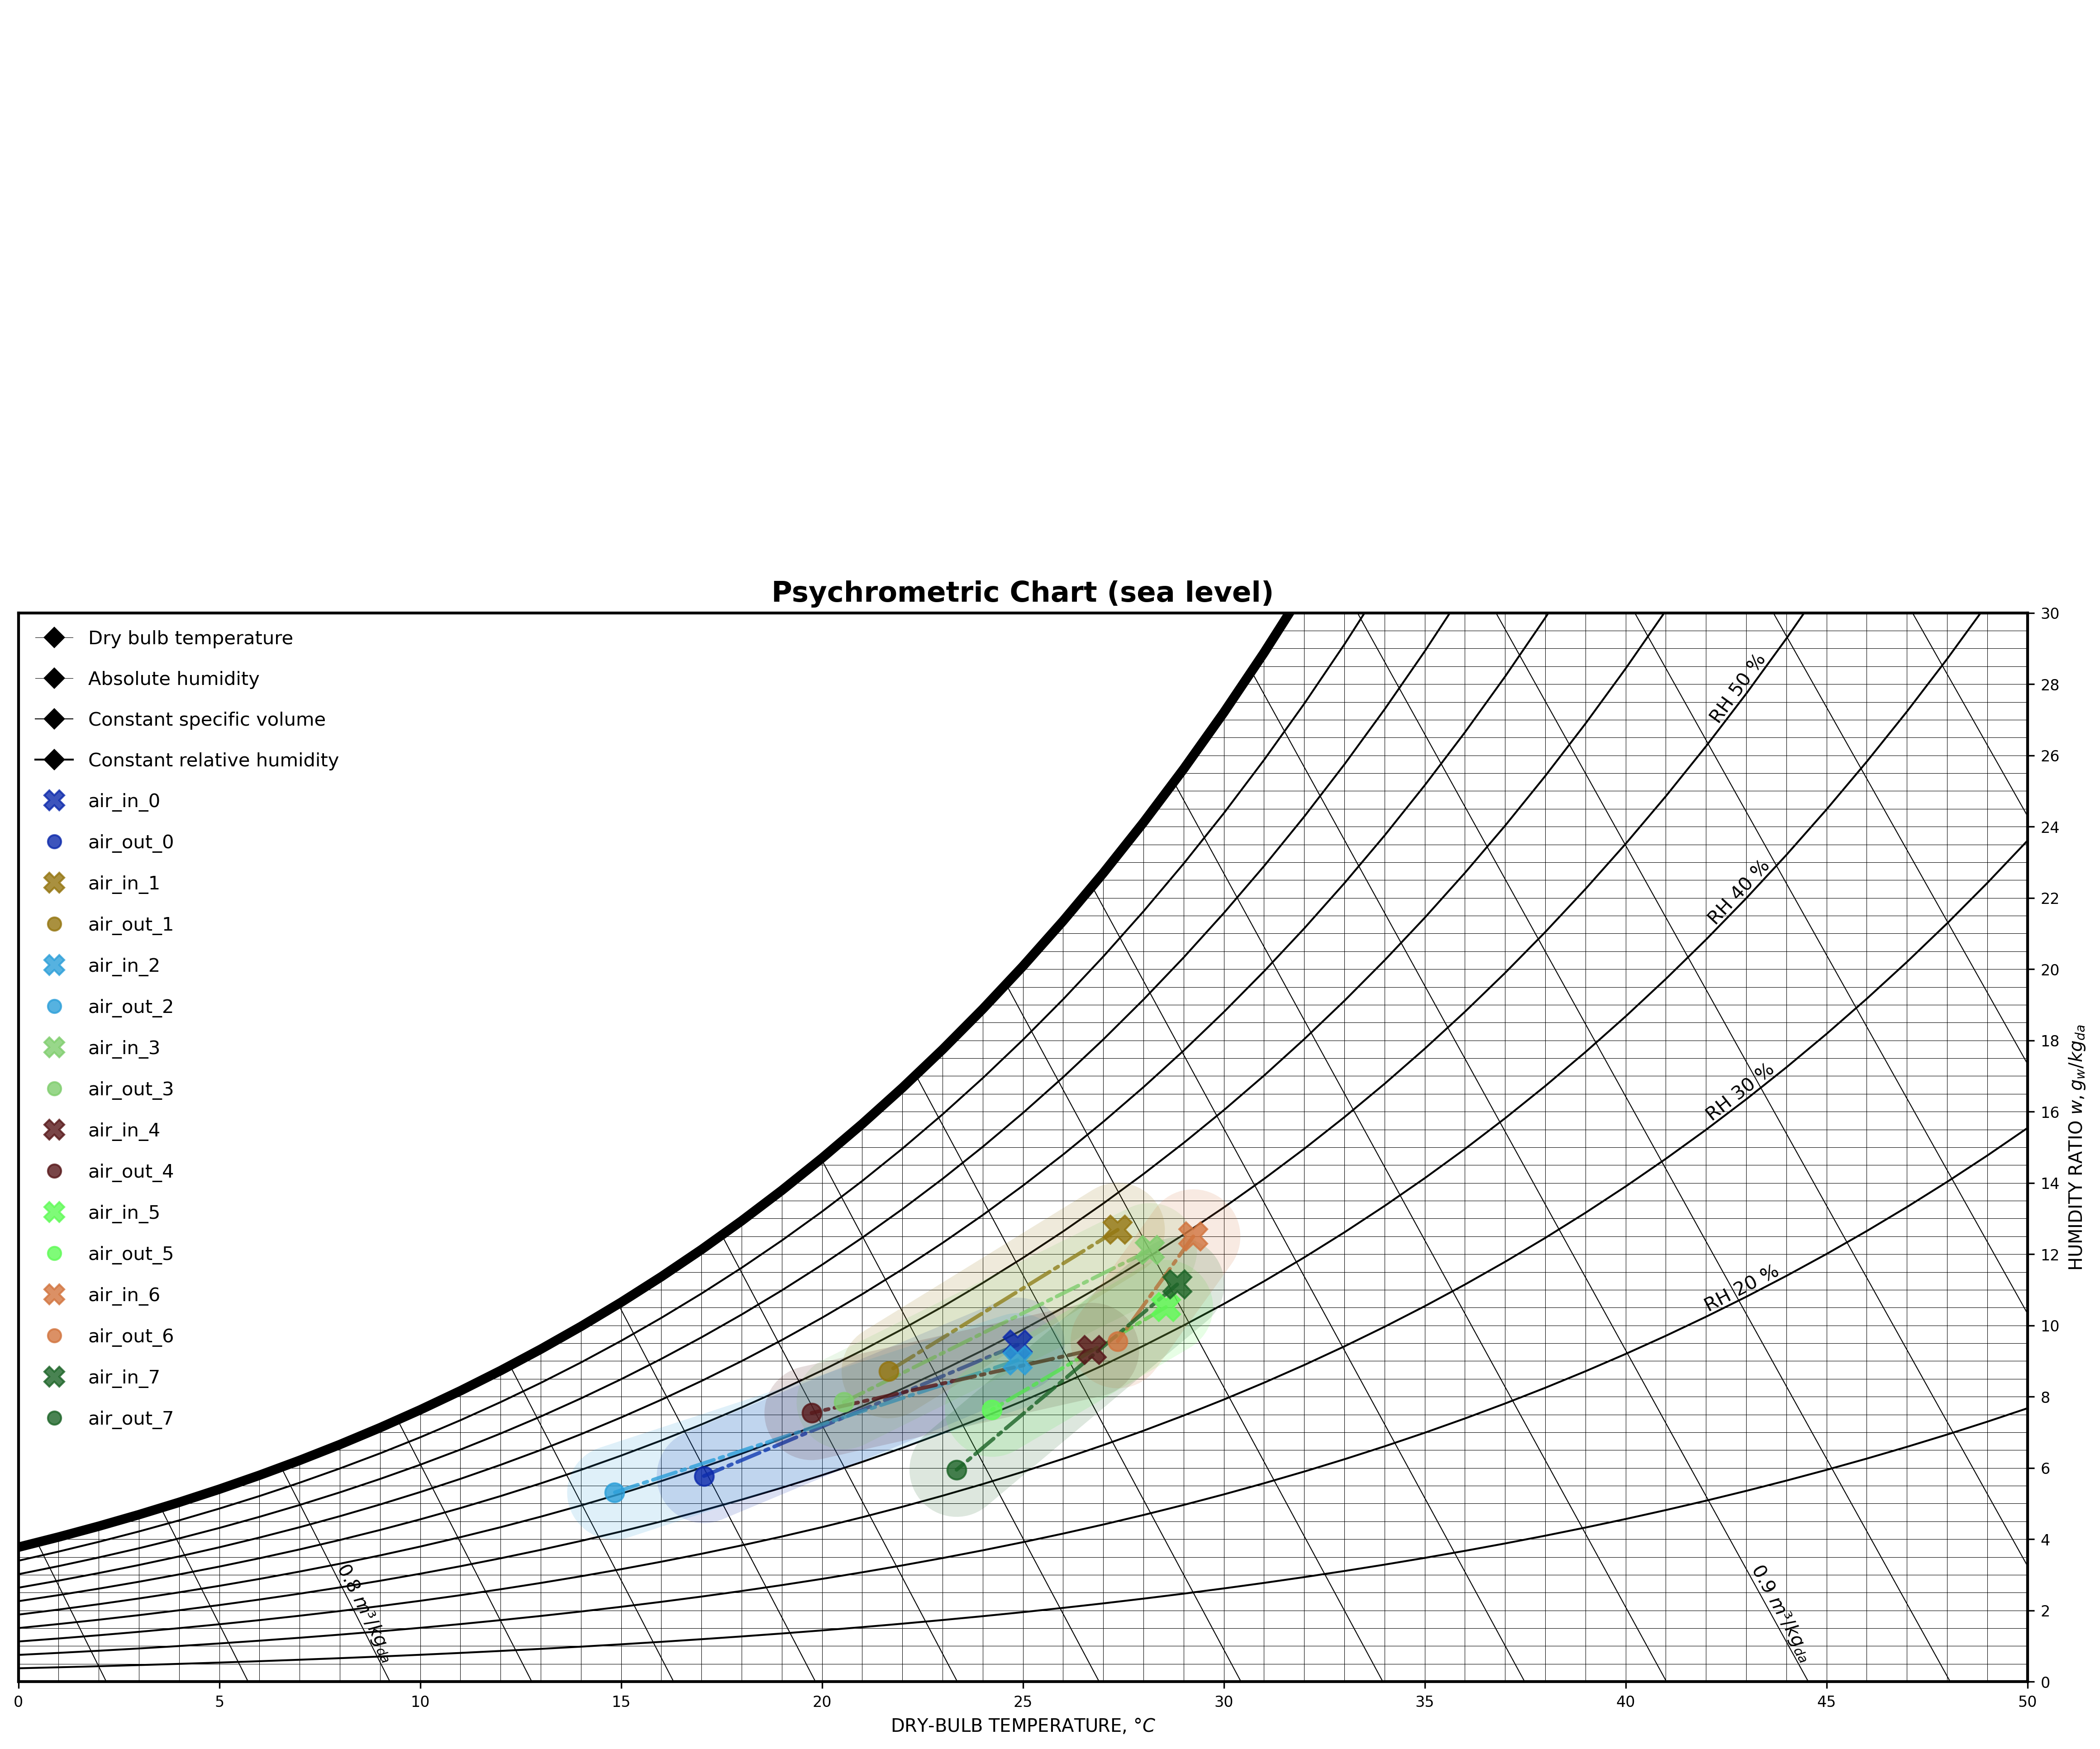

In [9]:
plot_psy_from_df(df_data=df_exp_dempav.iloc[0:8,:], alpha=0.8)

[0.46470534 0.81043624 0.97757808 0.8       ]
[0.08296283 0.1096707  0.17177038 0.8       ]
[0.2400609  0.37370008 0.64826682 0.8       ]
[0.45713868 0.5175833  0.82693191 0.8       ]
[0.6069368  0.14094926 0.64470606 0.8       ]
[0.69597698 0.49933381 0.20866309 0.8       ]
[0.03669852 0.50653159 0.89708085 0.8       ]
[0.42561397 0.12506547 0.76243483 0.8       ]


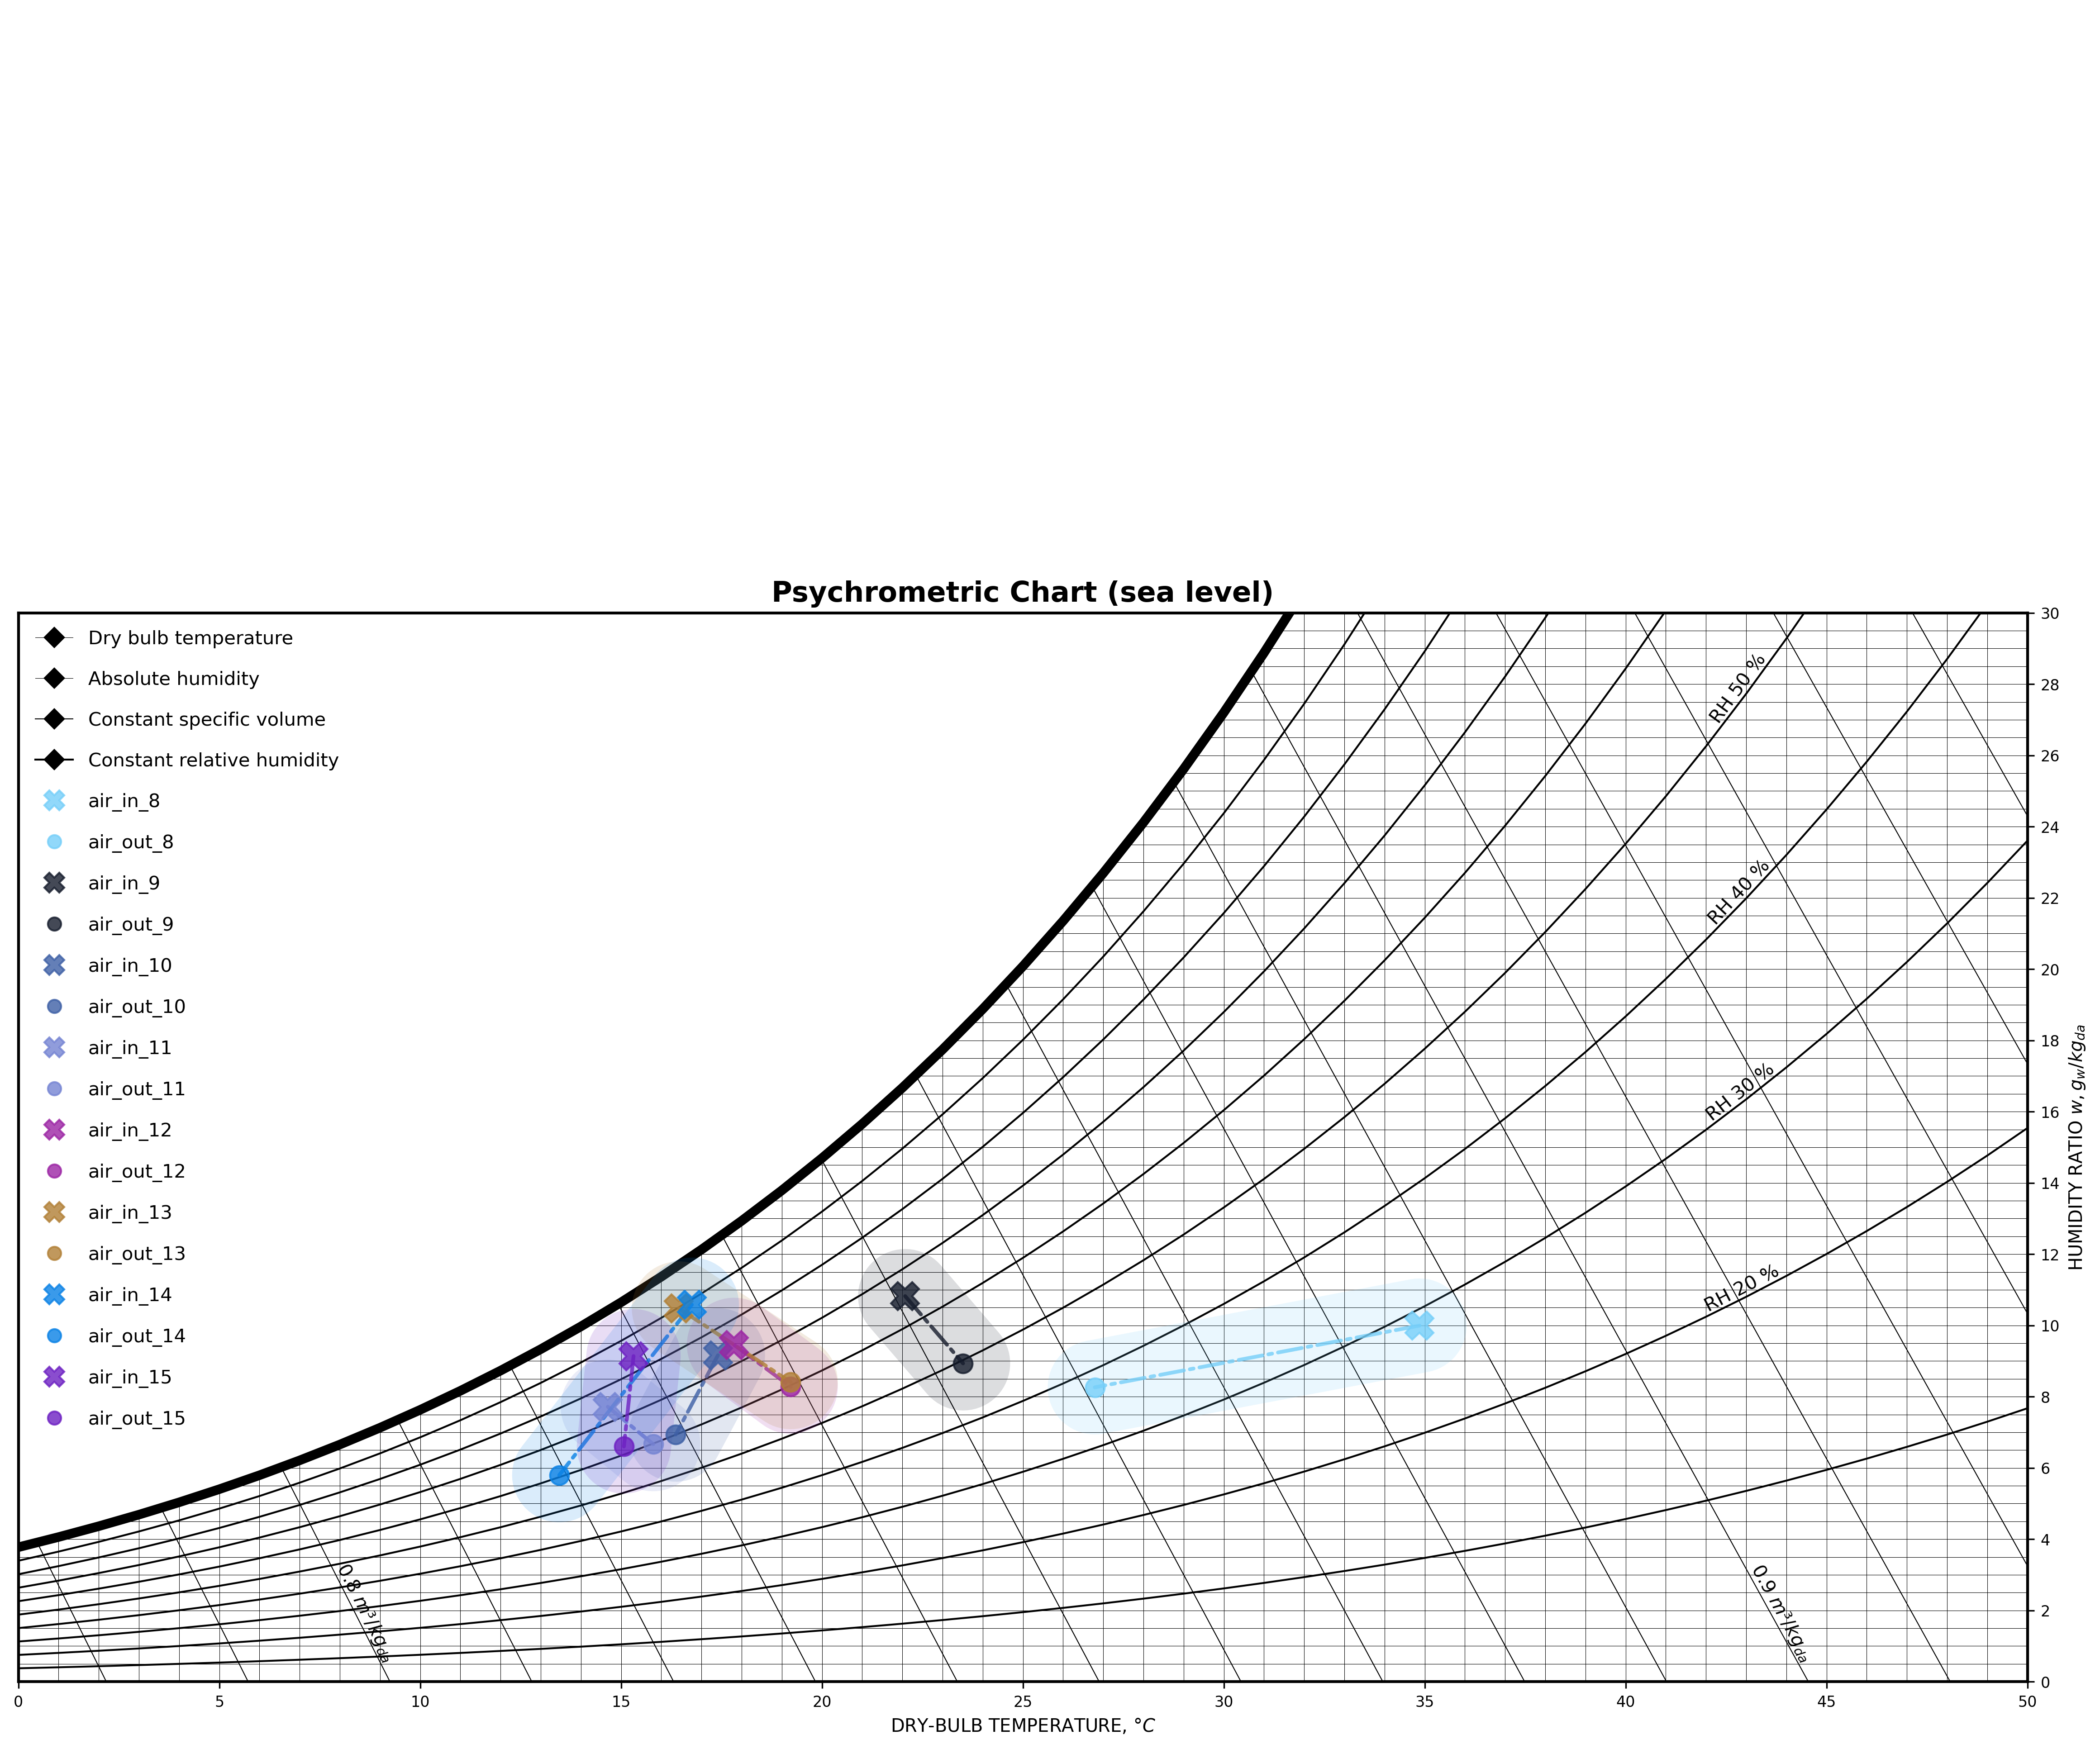

In [13]:
plot_psy_from_df(df_data=df_exp_dempav.iloc[8:16,:], alpha=0.8)

[0.74302163 0.32450838 0.24312626 0.8       ]
[0.35257591 0.3125823  0.63018234 0.8       ]
[0.11313    0.47336714 0.91669573 0.8       ]
[0.12976863 0.14760842 0.79362054 0.8       ]
[0.33273498 0.37848766 0.03809818 0.8       ]
[0.59068895 0.49213102 0.06745246 0.8       ]
[0.64437899 0.64239336 0.29053349 0.8       ]
[0.13079715 0.75637528 0.73690678 0.8       ]
[0.26909172 0.04294878 0.17721069 0.8       ]


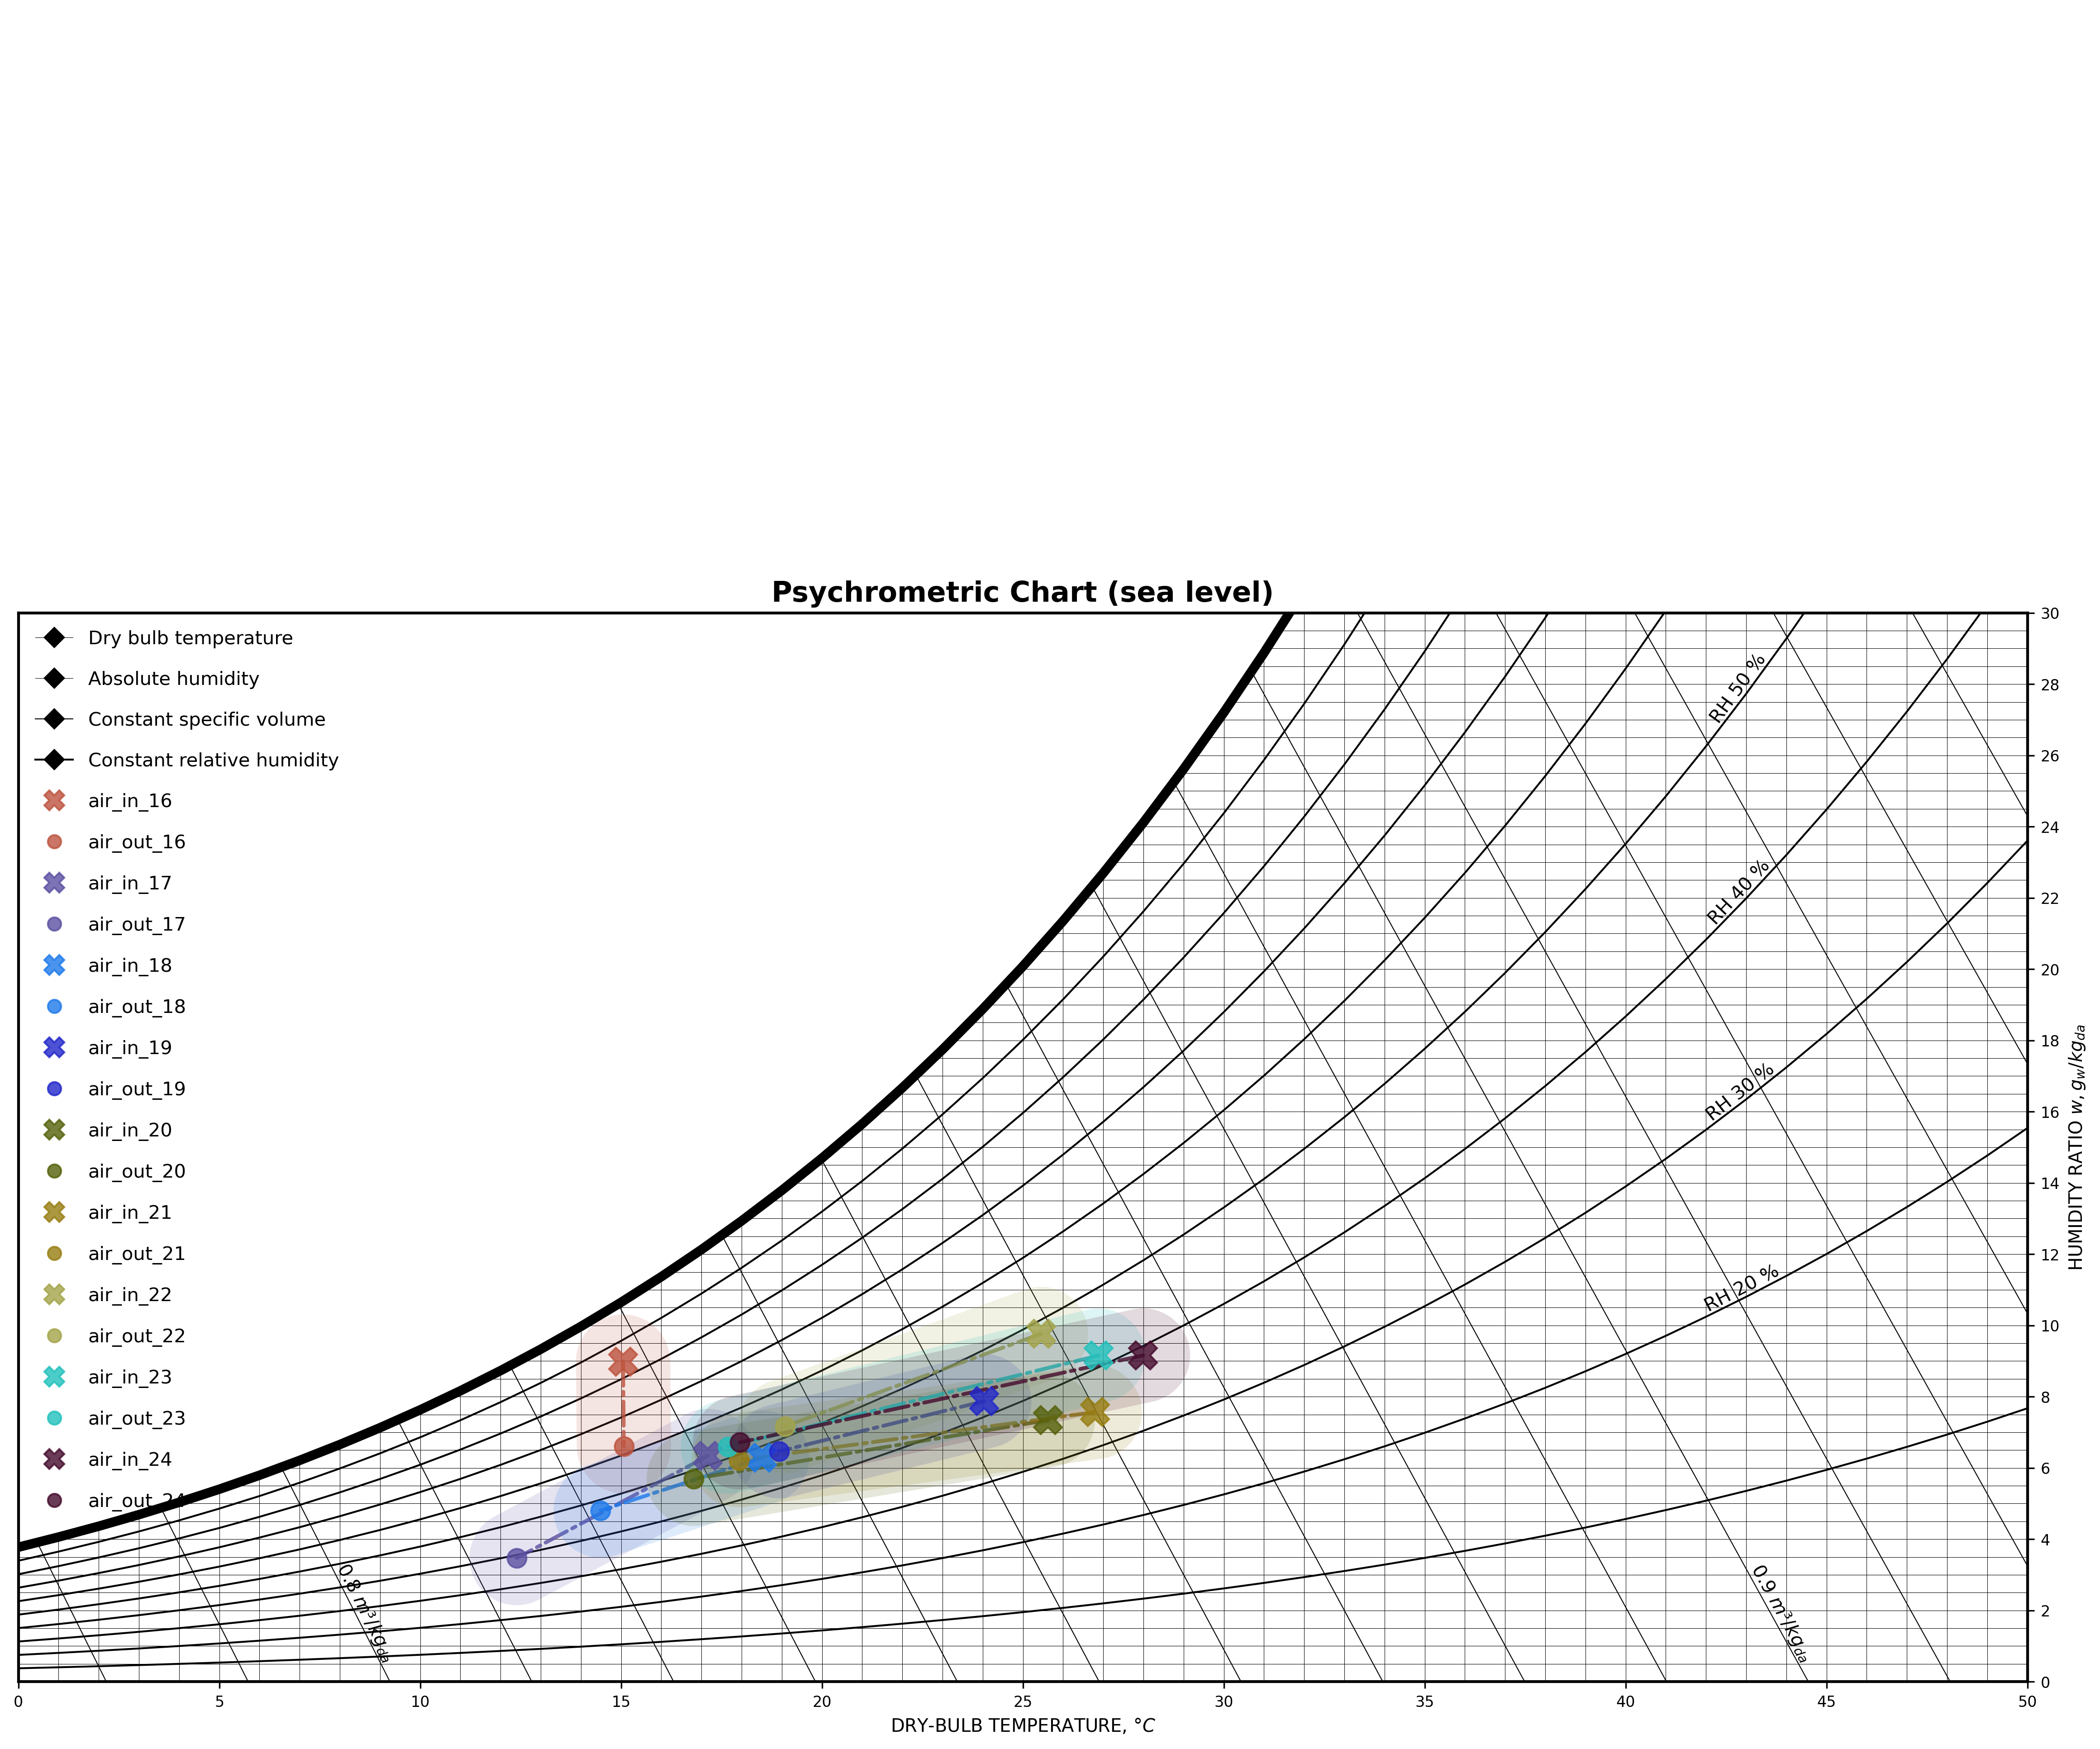

In [14]:
plot_psy_from_df(df_data=df_exp_dempav.iloc[16:,:], alpha=0.8)

# Experiment data

In [13]:
df_chen_data = pd.read_excel("../table/Chen2016.xlsx", index_col=0)#.drop(columns = ["Unnamed: 0"])

In [14]:
df_chen_data['hr_a_in'] = np.vectorize(convert_to_hr)(df_chen_data.T_a_in, df_chen_data.x_a_in)
df_chen_data['hr_a_o_exp'] = np.vectorize(convert_to_hr)(df_chen_data.T_a_o_exp, df_chen_data.x_a_o_exp)

In [16]:
df_test_data = pd.read_csv("../table/exp_data_KT1.csv", sep=",").drop(columns=["Unnamed: 0"])

### description of data

* Air
 * measured
     * $T_{air,in}$ (K) (HT03AIm, Ti03AIm)
     * $T_{air,out}$ (K) (HT03AOm, Ti03AOm)
     * $RH_{air,in}$ (%) (HH03AIm)
     * $RH_{air,out}$ (%) (HH03AOm)
     * $v_{air}$ (m3/h) (Fi03AIm, Fi01AOa)
 * calc
     * $m_{air}$ (kg/s) 
<br />
<br />
* Desiccant
 * measured
     * $T_{des,in}$ (K) (Ti03DIm)
     * $\rho_(des,in)$ (kg/m3) (RH03DIa) seems to be the density at outport, the different shouldn't be large
     * $v_des$ (l/min) (Fi03DIm)
 * calc
     * $m_{des}$ (kg/s)
     * $x_{des}$ (kg/kg)
     * $T_{des,out}$ (K)

In [15]:
df_test_data.to_excel('dempav.xlsx')

In [20]:
def plot_psy_from_df_chen(df_data, li_number_from_df, chart_template = 'ashrae', alpha = 0.6, save_fig_name = False):
    
    # pre-configuration
    # Get a preconfigured style dict
    config_ashrae = load_config(chart_template)

    # customize configuration:
    # config_ashrae['figure']['x_label'] = None
    # config_ashrae['figure']['y_label'] = None
    config_ashrae['saturation']['linewidth'] = 5
    config_ashrae['chart_params']['with_constant_dry_temp'] = True
    config_ashrae['chart_params']['with_constant_humidity'] = True
    config_ashrae['chart_params']['with_constant_wet_temp'] = False
    config_ashrae['chart_params']['with_constant_h'] = False

    chart_customized_ashrae = PsychroChart(config_ashrae)
    # Plot the chart
    ax = chart_customized_ashrae.plot()
    
    points = {}
    connectors = []
    for i in li_number_from_df:
        
        # inlet
        air_in = 'air_in_{}'.format(i)
        T_air_in = df_data.loc[i, "T_a_in"]
        rh_air_in = df_data.loc[i, "hr_a_in"]*100        
        
        # outlet
        air_out = 'air_out_{}'.format(i)
        T_air_out = df_data.loc[i, "T_a_o_exp"]
        rh_air_out = df_data.loc[i, "hr_a_o_exp"]*100
        
        # color
        color = np.append(np.random.rand(3), alpha)
        print(color)
        
        # plot points
        point = {air_in: {'label': 'air_in_{}'.format(i),
                           'style': {'color': color,
                                     'marker': 'X', 'markersize': 15},
                           'xy': (T_air_in-273.15, rh_air_in)},
              air_out: {
                  'label': 'air_out_{}'.format(i),
                  'style': {'color': color,
                            'marker': 'o', 'markersize': 10},
                  'xy': (T_air_out-273.15, rh_air_out)}                      
                    }
        
        # plot connectors
        # here the color CANNOT be specified by string e.g. red...
        connector = {'start': air_in,
                       'end': air_out,
                       'style': {'color': color,
                                 "linewidth": 2, "linestyle": "-."}}
        
        # add into dict and list
        points.update(point)
        connectors.append(connector)
        
    # add points and conncection to chart
    chart_customized_ashrae.plot_points_dbt_rh(points, connectors)

    # Add a legend
    chart_customized_ashrae.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
    
    if save_fig_name:
        ax.get_figure().savefig(save_fig_name)
    
    return ax.get_figure()

In [23]:
#plot_psy_from_df(df_data=df_test_data, li_number_from_df=df_test_data.index, alpha=0.8, save_fig_name='all_dempav.png')

[0.20703384 0.01379218 0.9377425  0.8       ]
[0.55188289 0.35206957 0.57621488 0.8       ]
[0.23223916 0.35846217 0.87445695 0.8       ]
[0.72015944 0.86484203 0.61989459 0.8       ]
[0.54123482 0.58111116 0.6434405  0.8       ]
[0.13483684 0.98366009 0.08434397 0.8       ]
[0.87891507 0.942689   0.91257741 0.8       ]
[0.6661065  0.85217118 0.35675606 0.8       ]
[0.1445477  0.56036096 0.00131961 0.8       ]
[0.74027088 0.03535472 0.31210921 0.8       ]
[0.55991034 0.33001901 0.42562224 0.8       ]
[0.39949041 0.35009464 0.47072636 0.8       ]
[0.87330519 0.58552029 0.84935144 0.8       ]
[0.4622033  0.3035648  0.58986101 0.8       ]
[0.04157774 0.05190912 0.31125442 0.8       ]


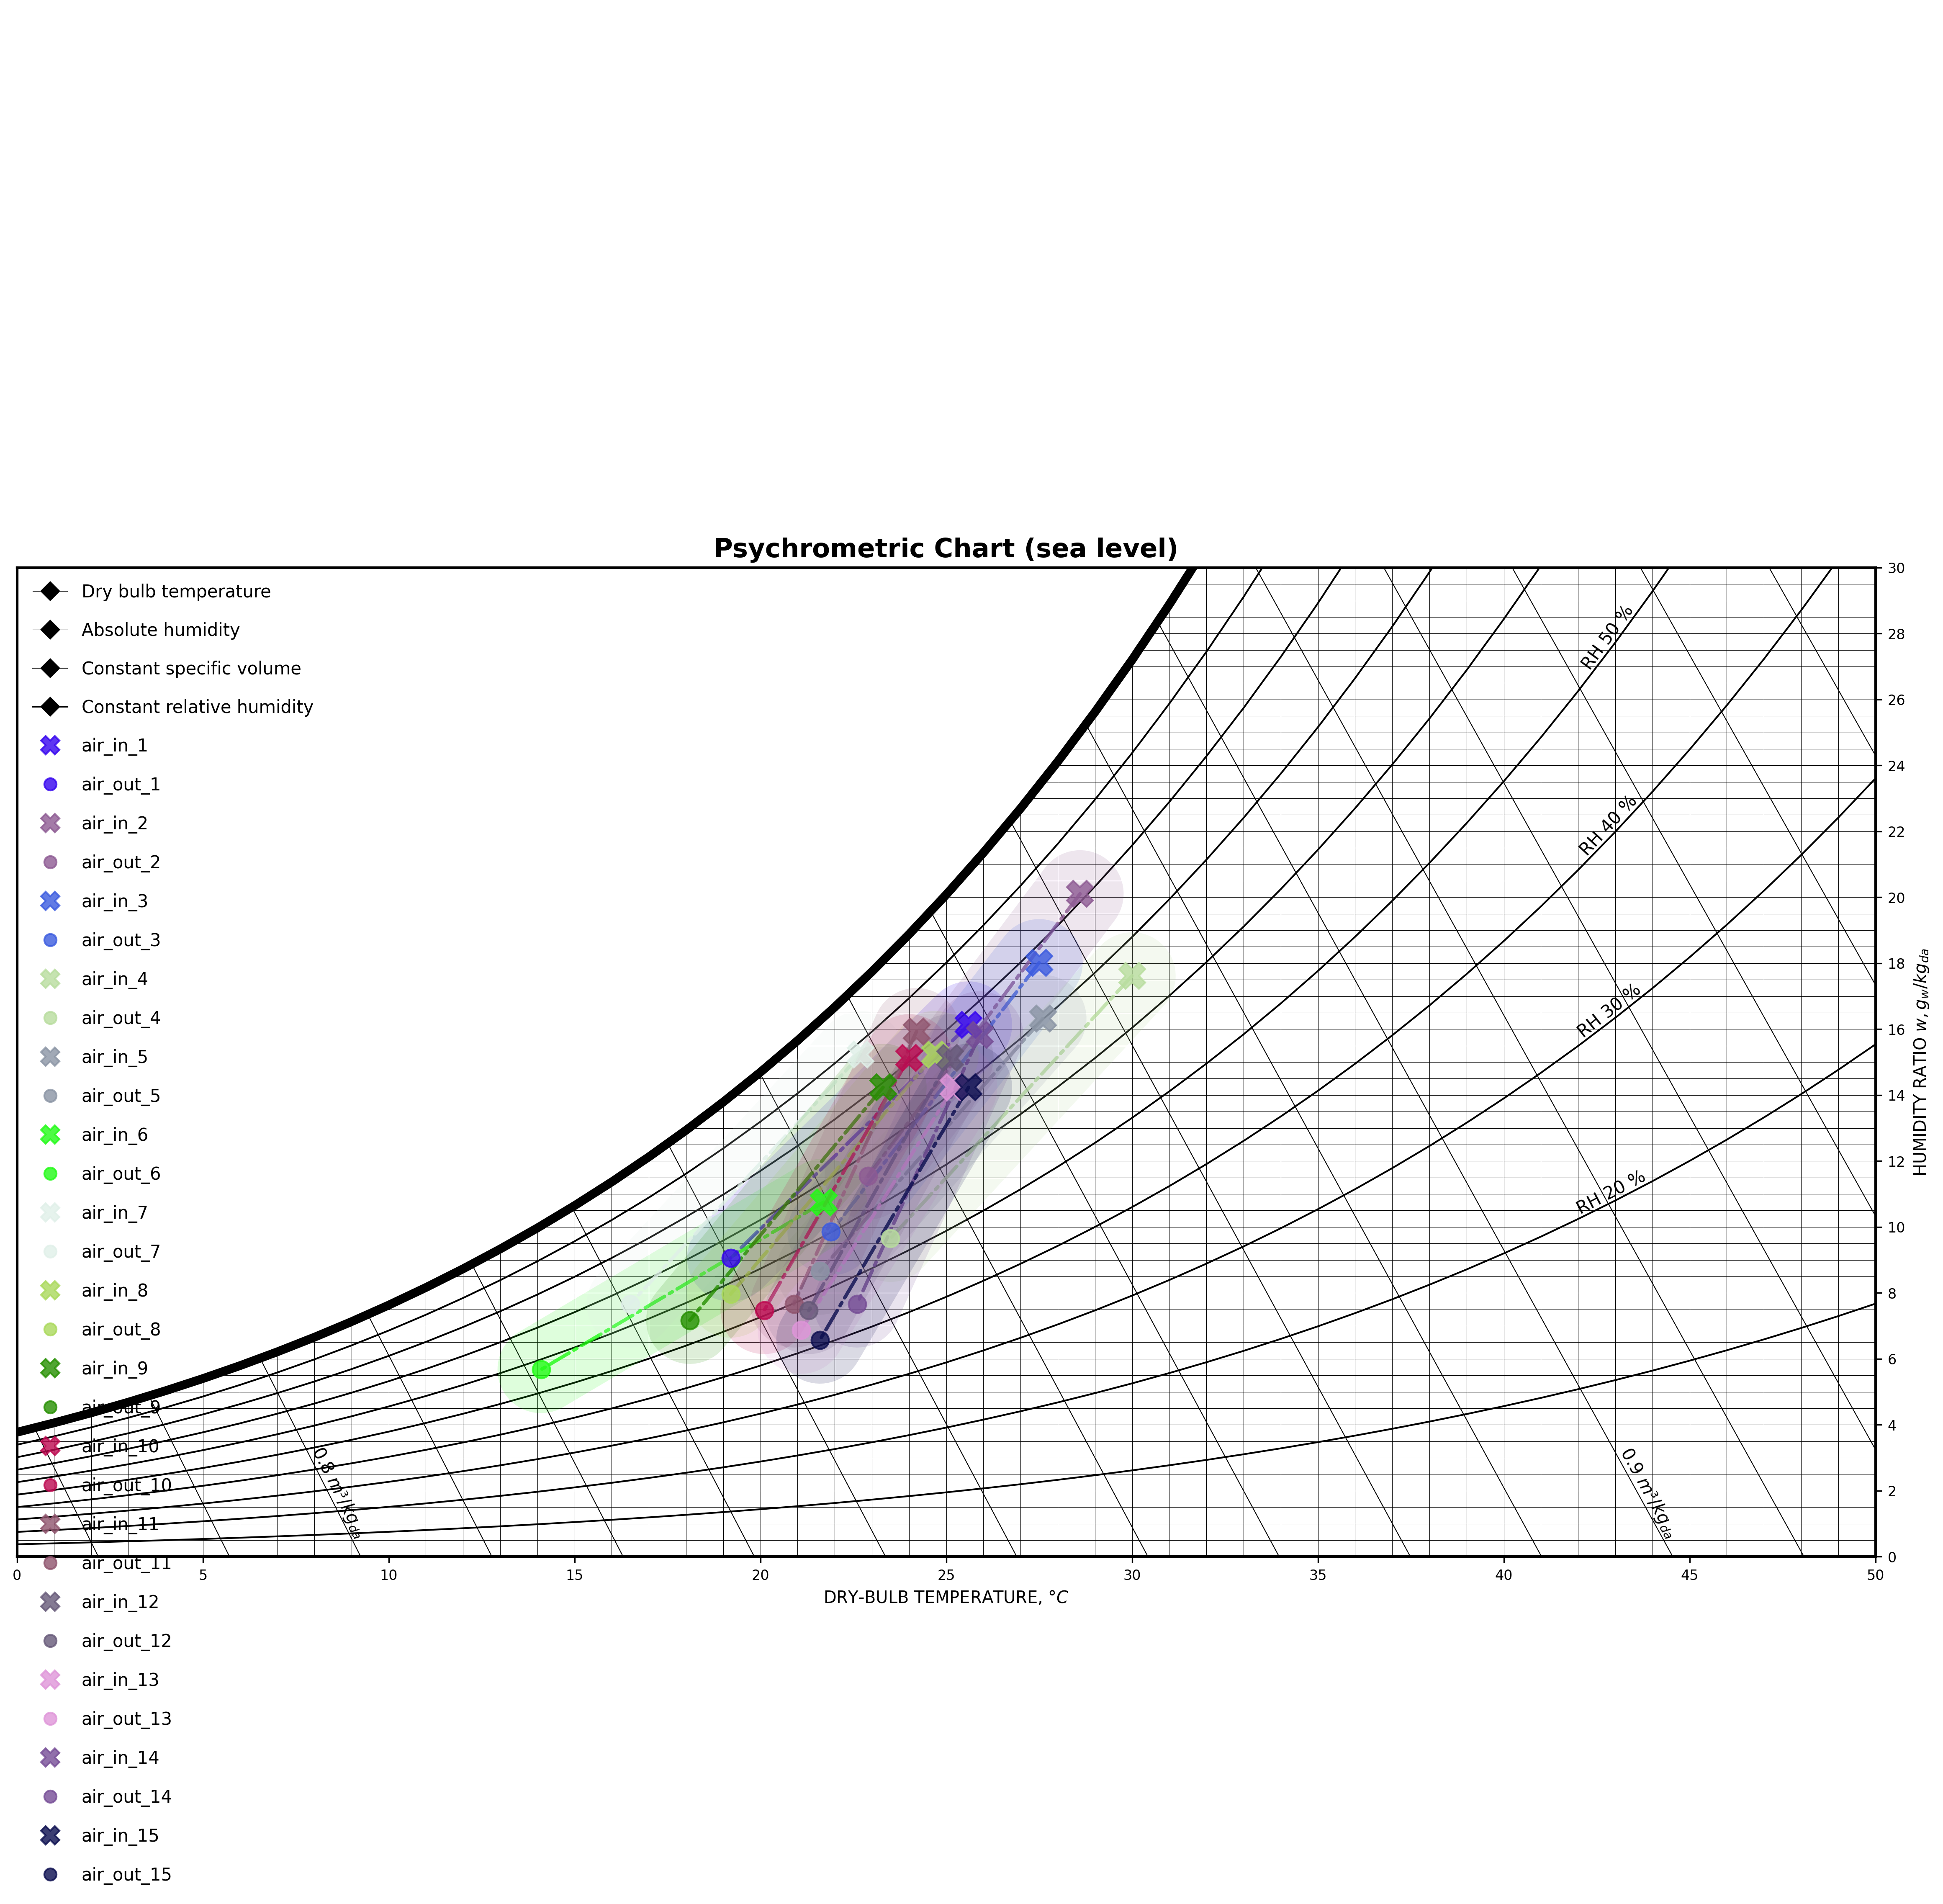

In [22]:
plot_psy_from_df_chen(df_data=df_chen_data, li_number_from_df=df_chen_data.index, alpha=0.8, save_fig_name='chen2016.png')

### give parameter manually

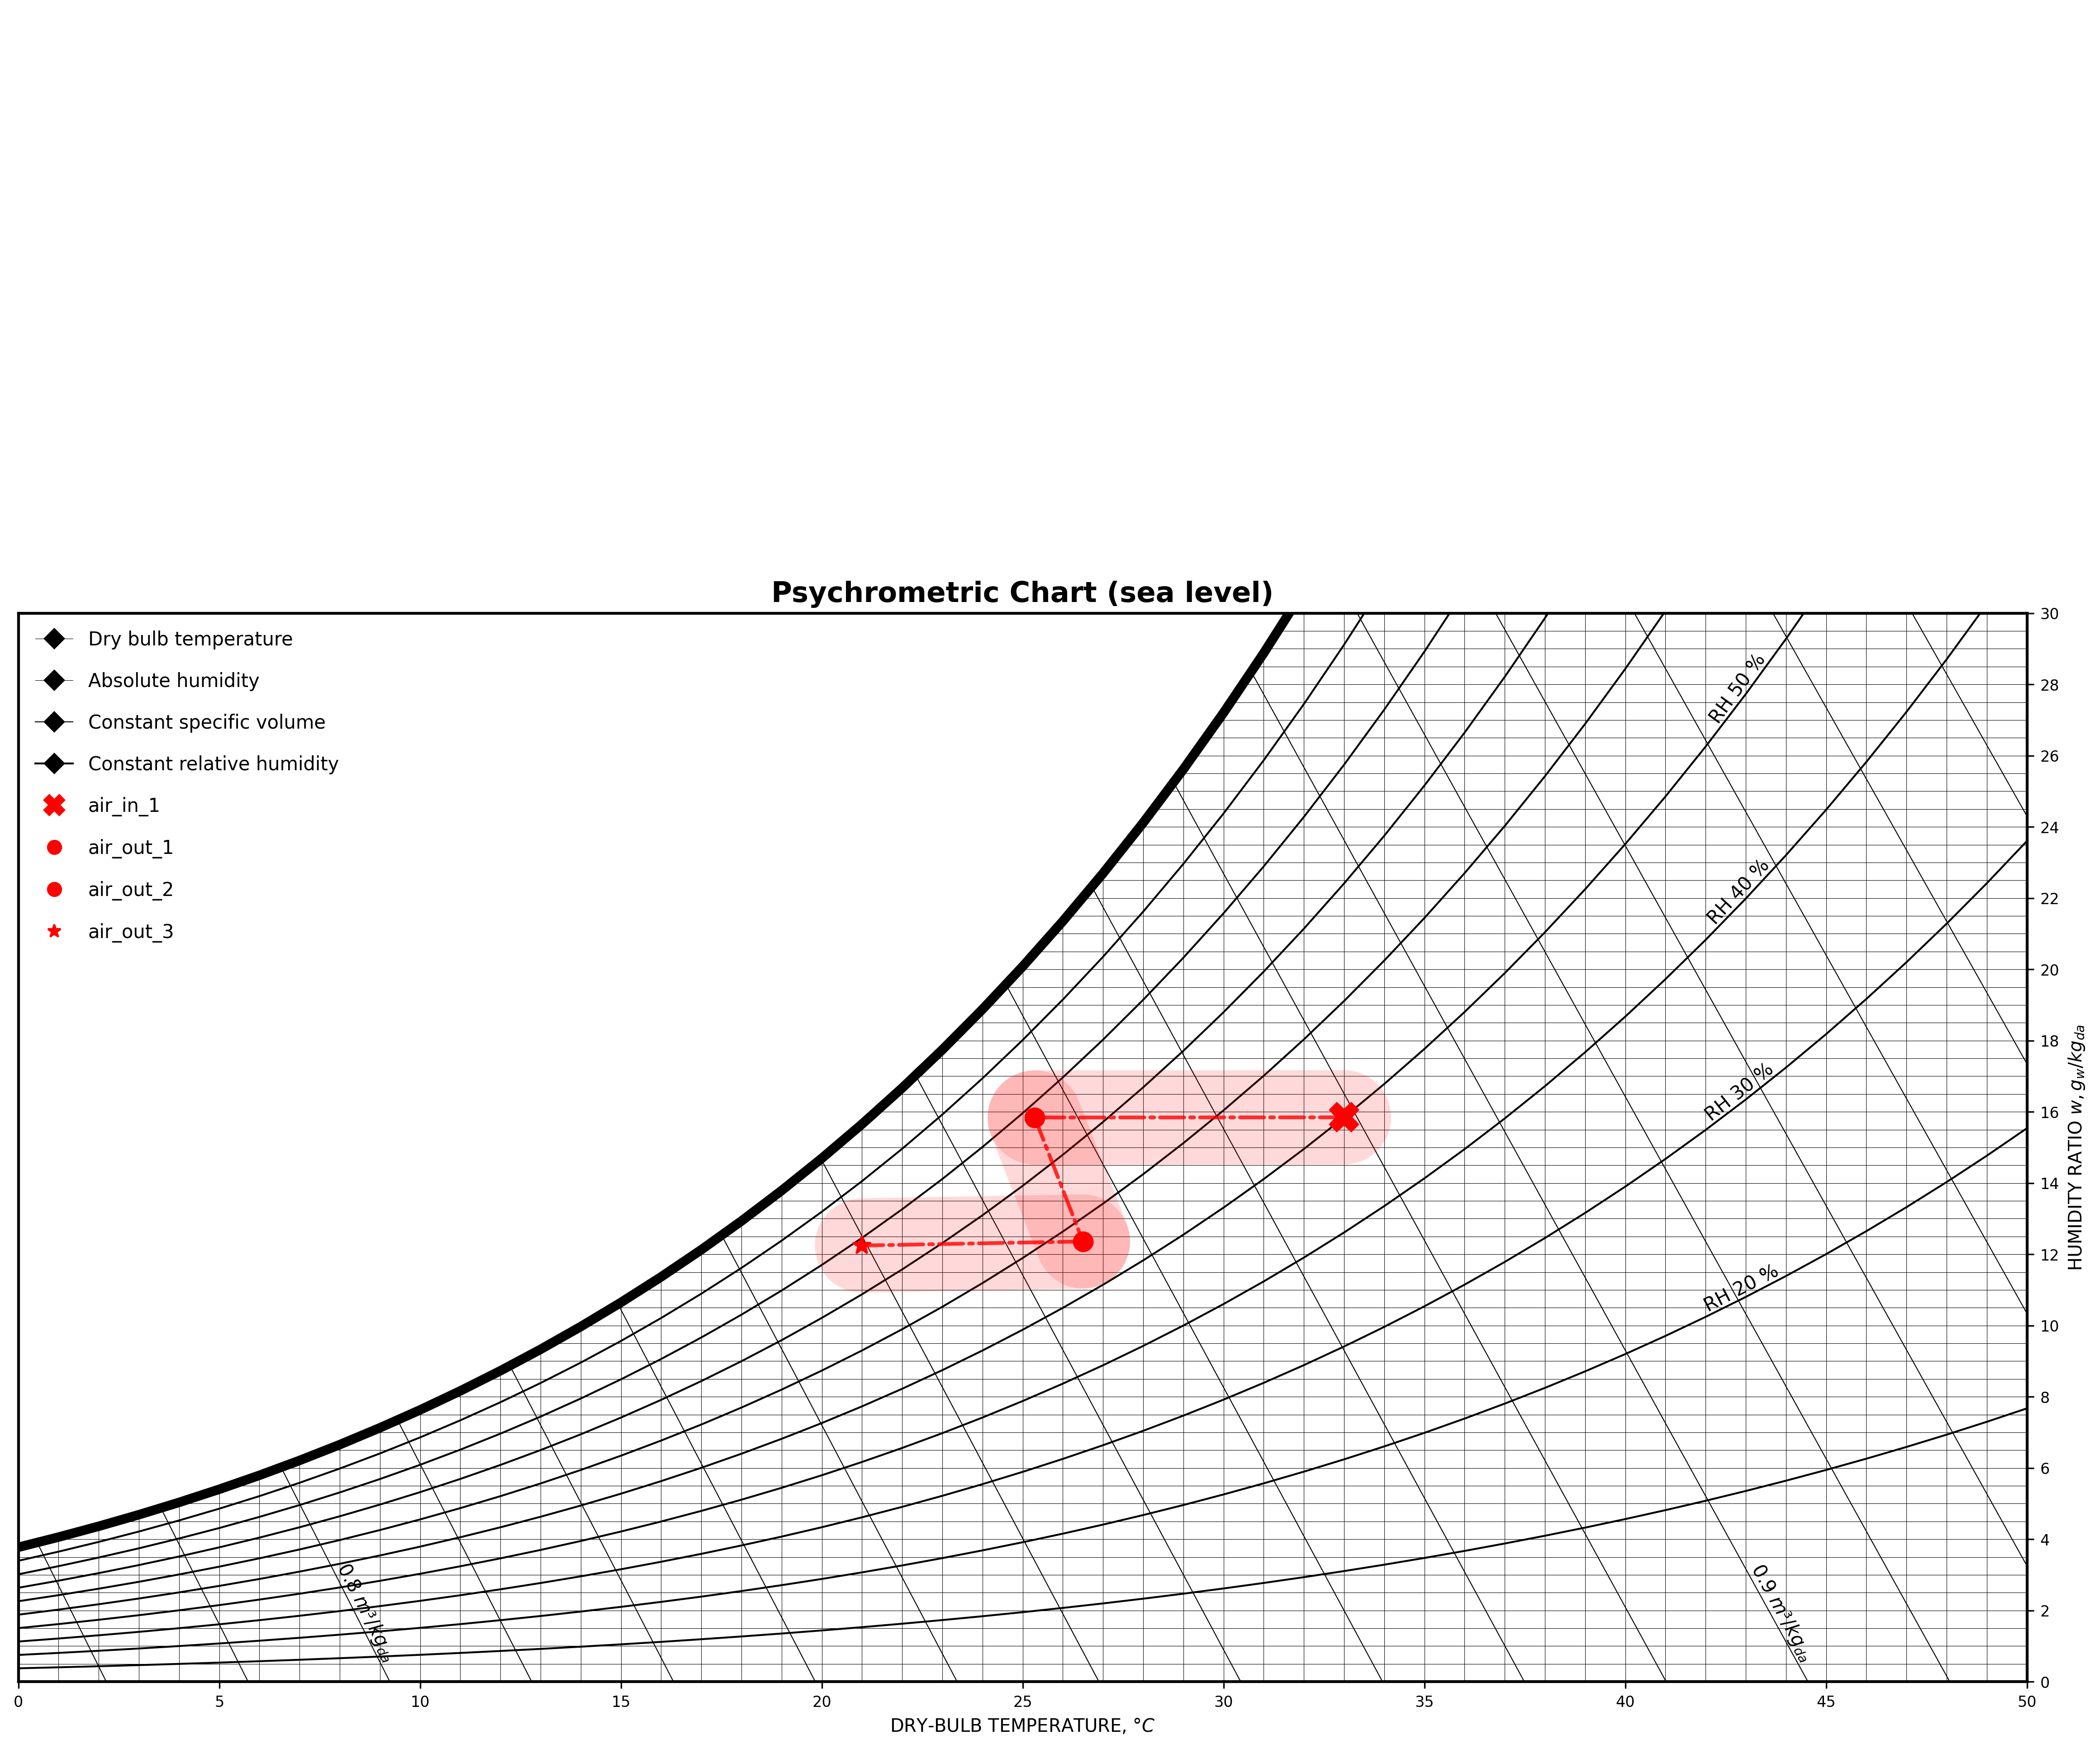

In [49]:
chart_template = "ashrae"
config_ashrae = load_config(chart_template)

# customize configuration:
# config_ashrae['figure']['x_label'] = None
# config_ashrae['figure']['y_label'] = None
config_ashrae['saturation']['linewidth'] = 5
config_ashrae['chart_params']['with_constant_dry_temp'] = True
config_ashrae['chart_params']['with_constant_humidity'] = True
config_ashrae['chart_params']['with_constant_wet_temp'] = False
config_ashrae['chart_params']['with_constant_h'] = False

chart_customized_ashrae = PsychroChart(config_ashrae)

# Plot the chart
ax = chart_customized_ashrae.plot()

# here the color CAN be specified by string e.g. red...
points = {'air_in_1': {'label': 'air_in_1',
                       'style': {'color': "red",
                                 'marker': 'X', 'markersize': 15},
                       'xy': (33, 50)},
          'air_out_1': {
              'label': 'air_out_1',
              'style': {'color': "red",
                        'marker': 'o', 'markersize': 10},
              'xy': (25.3, 78)},
          'air_out_2': {
              'label': 'air_out_2',
              'style': {'color': "red",
                        'marker': 'o', 'markersize': 10},
              'xy': (26.5, 57)},
          'air_out_3': {
              'label': 'air_out_3',
              'style': {'color': "red",
                        'marker': '*', 'markersize': 10},
              'xy': (21, 78.6465)},
}
#           'air_in_2': {'label': 'air_in_2',
#                        'style': {'color': 'green',
#                                  'marker': 'X', 'markersize': 15},
#                        'xy': (287.82-273.15, 74.37)},
          
#           'air_out_2':{
#               'label':'air_out_2',
#               'style':{'color':'green', 'marker':'o', 'markersize':10},
#               'xy': (288.95-273.15, 59.86)},                         


# here the color CANNOT be specified by string e.g. red...
connectors = [{'start': 'air_in_1',
               'end': 'air_out_1',
               'style': {'color': [1,0,0,0.8],
                         "linewidth": 2, "linestyle": "-."}},
              {'start': 'air_out_1',
               'end': 'air_out_2',
               'style': {'color': [1, 0, 0, 0.8],
                         "linewidth": 2, "linestyle": "-."}},
              {'start': 'air_out_2',
               'end': 'air_out_3',
               'style': {'color': [1, 0, 0, 0.8],
                         "linewidth": 2, "linestyle": "-."}},
             ]    
             


chart_customized_ashrae.plot_points_dbt_rh(points, connectors)

# Add a legend
chart_customized_ashrae.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
ax.get_figure()
# ax.get_figure().savefig('./plot/cooling_example.png', dpi=300)

In [45]:
HAPropsSI('R', 'T',273.15+21 ,'P',101325, 'W',0.0123)

0.7864651371082688

In [43]:
HAPropsSI('W','T',306.15,'P',101325,'R',0.5)

0.015920472237100365